# **1.Customer Segmantation Problem**

<a id = Section2></a>

---
# **2. Problem Statement**
---

At some point, it becomes **impossible** to **focus** on an **individual customer** and **sometimes** the **communication** between customers **become** **complex**. We **need** **a way** out to **understand** our **customers** in **structured** and **shared manner**.

<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Retail/Customer%20Segmentation%202.png"></center>

**<h3>Scenario:</h3>**

**Knack Grant** is a UK based non-store **online retail company** started in 2009. The company mainly **sells** unique **all-occasion gift-ware**. Many customers of the company are wholesalers. The **company** is **growing** at **rapid speed**. At the **same time** they are **unable** to **catch up** the **customer expectation** and **maintain healthy relationship** i.e failing in Customer Relationship Management(CRM).

In order **to tackle this problem**, they **hired a team of data scientists**. They **need** an **automated solution** to **identify** the **customers expectations** and the **future trends** so that they can **engage** with customers in **more structured and shared manner** leading their company to future endavours.

**Note:** 
- This **problem** is a type of **unsupervised learning**, i.e. there is no target present in our data. 

- We will **clusters customers based on their behavior**.

- It will **give** us an **approximation** about the **customer purchasing behavior** **leading** to **better marketing**.

<a id = Section3></a>

---
# **3. Installing & Importing Libraries**
---

<a id = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Toolbox for Generating Statistics Report

     |████████████████████████████████| 71kB 1.9MB/s 


<a id = Section32></a>
### **3.2 Upgrading Libraries**

**Note:** After upgrading, you need to restart the runtime. Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [2]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade yellowbrick

     |████████████████████████████████| 266kB 2.8MB/s 
     |████████████████████████████████| 71kB 5.9MB/s 
     |████████████████████████████████| 3.1MB 9.0MB/s 
     |████████████████████████████████| 604kB 17.6MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 296kB 34.6MB/s 
     |████████████████████████████████| 266kB 2.8MB/s 


<a id = Section33></a>
### **3.3 Importing Libraries**

In [3]:
# For Panel Data Analysis
import pandas as pd
from pandas_profiling import ProfileReport
import pandas.util.testing as tm
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)

# For Numerical Python
import numpy as np

# For Random seed values
from random import randint

# For Scientifc Python
from scipy import stats

# For datetime
import datetime
from datetime import datetime as dt


# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from plotly.offline import plot
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# For Data Modeling
from sklearn.cluster import KMeans

# To Disable Warnings
import warnings
warnings.filterwarnings(action = "ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


<a id = Section4></a>

---
# **4. Data Acquisition & Wrangling**
---

This data set is based on online transactions occurring between 01/12/2017 and 09/12/2019 and is accessible <a href="https://storage.googleapis.com/retail-analytics-data/OnlineRetailV3.csv">here</a>.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 1067371 | 8 | 90.4 MB|

|Id|Features|Description|
| :-- | :-- | :-- |
|01|**Invoice**|Invoice number. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.|
|02|**StockCode**|Product item code. A 5-digit integral number along with letters uniquely assigned to each distinct product.|
|03|**Description**|Product item name.|
|04|**Quantity**|The quantities of each product item per transaction. Some values are negative due error while tracking data under process.|
|05|**InvoiceDate**|Invice date and time. The day and time when a transaction was generated.|
|06|**Price**|Product price per unit in sterling (&pound;).|
|07|**Customer ID**|Customer number. A 5-digit integral number uniquely assigned to each customer.|
|08|**Country**|Country name. The name of the country where a customer resides.|

In [4]:
LINK = 'https://storage.googleapis.com/retail-analytics-data/OnlineRetailV3.csv'

def load_cust_seg_data(link = LINK):
  return pd.read_csv(filepath_or_buffer = link)

In [5]:
data = load_cust_seg_data()
print('Data Shape:', data.shape)
data.head()

Data Shape: (1067371, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2017-12-1,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2017-12-1,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2017-12-1,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2017-12-1,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2017-12-1,1.25,13085.0,United Kingdom


<a id = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.


In [6]:
print('Described Column Length:', len(data.describe().columns))
data.describe()

Described Column Length: 3


,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


**Observation:**

- On **average** customer had **bought** around **quantity** of **10** of **each** product **item**.

- **25%**  of customers **bought** product **items** with <= **unit** **quantity**, while **50%** and **75%** of customers **bought** product **item** with **quantity <= 3 and 10**.

- **Average** **price** of all the **transacted items** was **&pound;4.64 pounds**.

- **25%** of product **items** had **price of &pound;1.25 pounds**, while **50% and 75%** of **items** had **price of &pound;2.1 pounds** and **&pound;4.15 pounds**.

<a id = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


**Observation:**

- **Feature:** 
  - Problem &rarr; Action Required
- **Description:**
  - Missing Information (4382 Records) &rarr; Drop Records
- **InvoiceDate:**
  - Incorrect Data Type &rarr; Datatime Transformation
- **Customer ID:**
  - Incorrect Data Type &rarr; Integer Transformation
  - Missing Information (243007 Records) &rarr; Drop Records

<a id = Section43></a>
### **4.3 Numerical Data Distribution:**

- We shall plot all **numerical features to analyze the distribution** of their past.

- But **before** that we must **extract** all the **numerical** **features** which has been **performed** **below**.

In [8]:
num_feature = []

for i in data.columns.values:
  if ((data[i].dtype == int) | (data[i].dtype == float)):
    num_feature.append(i)
    
print('Total Numerical Features:', len(num_feature))
print('Features:', num_feature)

# Dropping Customer ID
num_feature.remove('Customer ID')
print('Final Numerical Features:', num_feature)

Total Numerical Features: 3
Features: ['Quantity', 'Price', 'Customer ID']
Final Numerical Features: ['Quantity', 'Price']


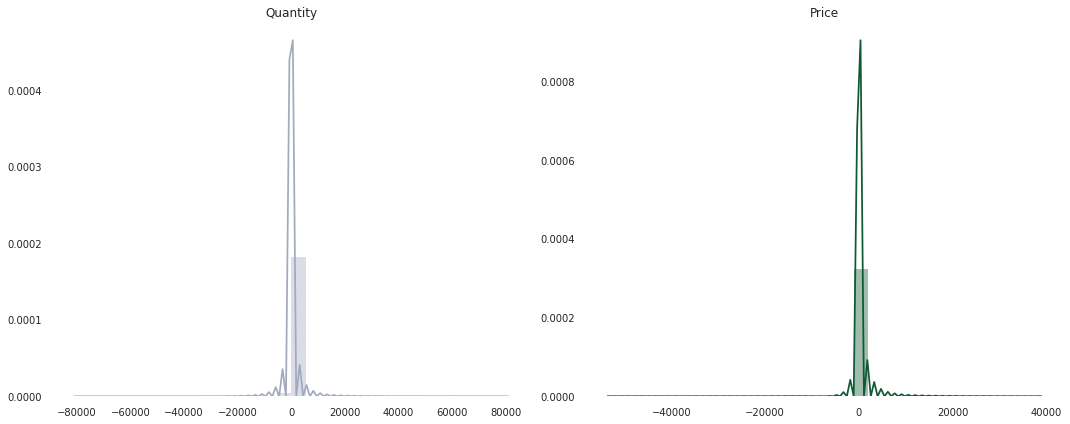

In [9]:
# Creating subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 6))

# Generating random colors based on number of columns
colors = []
for i in range(len(num_feature)):
  colors.append('#%06X' % randint(0, 0xFFFFFF))  
                
for ax, col, color in zip(axes.flat, num_feature, colors):
  sns.distplot(a = data[col], bins = 30, ax = ax, color = color)
  ax.set_title(col)
  plt.setp(axes, xlabel = '')
  ax.grid(False)
plt.tight_layout()
plt.show()

**Observation:**

- **Quantity** and **Price** features are **positively skewed**.

<a id = Section44></a>
### **4.4 Pre Profiling Report**

- For quick analysis pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column statistics are presented in an interactive HTML report.

In [ ]:
#profile = ProfileReport(df = data)
#profile.to_file(output_file = 'Pre Profiling Report.html')
#print('Accomplished!')

In [ ]:
#from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
#files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

**Observation:**

- According to the report there are **total 8 variables** out which **5 are categorical and 3 are numerical**.

- Around **2.9% of data is missing** i.e. 247389 cells.

- Around **3.2% of rows are duplicate** i.e. 34335 rows.

- **Invoice, StockCode, Description, InvoiceDate** features have **high cardinalities**.

- There is **absence of correlation** **among features** with each others

<a id = Section5></a>

---
# **5. Data Pre-Processing**
---

<a id = Section51></a>
### **5.1 Identification & Handling of Missing Data**

#### **5.1.1 Null Data Identification & Handling**

**Before Handling Null Data**


In [10]:
null_frame = pd.DataFrame(index = data.columns.values)
null_frame['Null Frequency'] = data.isnull().sum().values
percent = data.isnull().sum().values/data.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
Null Frequency,0.0,0.0,4382.00,0.0,0.0,0.0,243007.00,0.0
Missing %age,0.0,0.0,0.41,0.0,0.0,0.0,22.77,0.0


**Observation:**

- **Feature:** 
  - Problem &rarr; Action Required {Reason}
- **Description:**
  - Missing information (4382) &rarr; Drop records {Ratio is very less, won't affect the results}
- **Customer ID:**
  - Missing information (243007) &rarr; Drop records {Ratio is not high enough, as we still have around 80% info to retain}

**Performing Operations**

In [11]:
print('Data Shape [Before]:', data.shape)
data.dropna(axis = 0, subset = ['Description', 'Customer ID'], inplace = True)
print('Data Shape [After]:', data.shape)

Data Shape [Before]: (1067371, 8)
Data Shape [After]: (824364, 8)


**After Handling Null Data**

- Now that we have performed the operations, let's verify whether the null data has been eliminated or not.

In [12]:
null_frame = pd.DataFrame(index = data.columns.values)
null_frame['Null Frequency'] = data.isnull().sum().values
percent = data.isnull().sum().values/data.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
Null Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Observation:**

- We can see that we have **eliminated null data successfully**.

#### **5.1.2 Zero Data Identification & Handling**

In [ ]:
zero_frame = pd.DataFrame(index = data.columns.values)
zero_frame['Null Frequency'] = data[data == 0].count().values
percent = data[data == 0].count().values / data.shape[0]
zero_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
zero_frame.transpose()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
Null Frequency,0.0,0.0,0.0,0.0,0.0,71.00,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0


**Observation:**

- **Feature:** 
  - Problem &rarr; Action Required {Reason}
- **Price:**
  - Identified 71 zeros &rarr; Drop records {Price of product item cannot be zero. Some orders were cancelled so price = 0}

**Performing Operations**

In [13]:
data = data[data['Price'] != 0]

**After Handling Zero Data**

- Now that we have performed the operations, let's verify whether the zero data has been eliminated or not.

In [14]:
zero_frame = pd.DataFrame(index = data.columns.values)
zero_frame['Null Frequency'] = data[data == 0].count().values
percent = data[data == 0].count().values / data.shape[0]
zero_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
zero_frame.transpose()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
Null Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Observation:**

- We can see that we have **eliminated zero data successfully**.

<a id = Section52></a>
### **5.2 Identification & Handling of Redundant Data**

- In this section **we will identify redundant rows and columns** in our data if present.

- **Before** we will **make a copy of our data** and **analyze** the **effect**. 

- **Later down**, all the **changes** will be **introduced** in the **original data**.
 

#### **5.2.1 Identfication & Handling of Redundant Records**

In [15]:
data_copy = data.copy()

**Before Handling Duplicate Rows**

In [16]:
print('Contains Redundant Records?:', data_copy.duplicated().any())
print('Duplicate Count:', data_copy.duplicated().sum())
print('Data Shape:', data_copy.shape)

Contains Redundant Records?: True
Duplicate Count: 26480
Data Shape: (824293, 8)


**Observation:**

- It turns out that there are **26479 duplicate** rows **present** in our data. 
- We will **drop** these **records** as they are **not useful** for our analysis and model development.

**Performing Operations**

In [17]:
before_shape = data_copy.shape
print('Data Shape [Before]:', before_shape)

data_copy.drop_duplicates(inplace = True)

after_shape = data_copy.shape
print('Data Shape [After]:', after_shape)

drop_percent = after_shape[0] / before_shape[0]
print('Drop Ratio:', np.round(drop_percent, decimals = 2))

Data Shape [Before]: (824293, 8)
Data Shape [After]: (797813, 8)
Drop Ratio: 0.97


**After Handling Duplicate Rows**

In [18]:
print('Contains Redundant Records?:', data_copy.duplicated().any())
print('Duplicate Count:', data_copy.duplicated().sum())
print('Data Shape:', data_copy.shape)

Contains Redundant Records?: False
Duplicate Count: 0
Data Shape: (797813, 8)


**Applying Above Operations on Original Data**

In [19]:
before_shape = data.shape
print('Data Shape [Before]:', before_shape)

data.drop_duplicates(inplace = True)

after_shape = data.shape
print('Data Shape [After]:', after_shape)

drop_percent = after_shape[0] / before_shape[0]
print('Drop Ratio:', np.round(drop_percent, decimals = 2))

print('Contains Redundant Records?:', data.duplicated().any())

Data Shape [Before]: (824293, 8)
Data Shape [After]: (797813, 8)
Drop Ratio: 0.97
Contains Redundant Records?: False


#### **5.2.2 Identfication & Handling of Redundant Features**

- For handling duplicate features we have created a custom function to identify duplicacy in features with different name but similar values below.

In [20]:
def duplicate_cols(dataframe):
  ls1 = []
  ls2 = []

  columns = dataframe.columns.values
  for i in range(0, len(columns)):
    for j in range(i+1, len(columns)):
      if (np.where(dataframe[columns[i]] == dataframe[columns[j]], True, False).all() == True):
        ls1.append(columns[i])
        ls2.append(columns[j])

  if ((len(ls1) == 0) & (len(ls2) == 0)):
    return None
  else:
    duplicate_frame = pd.DataFrame()
    duplicate_frame['Feature 1'] = ls1
    duplicate_frame['Feature 2'] = ls2
    return duplicate_frame

**Before Handling Redundant Columns**

In [21]:
print(duplicate_cols(data_copy))

None


**Observation:**

- It turns out that there are **no duplicate columns present** in our data.

<a id = Section53></a>
### **5.3 Identification & Handling of Inconsistent Data Types**

**Before changes: Respective Data Type per Feature**

In [22]:
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
Type,object,object,object,int64,object,float64,float64,object


**Observation:**

- **Inconsistent Feature:** 
  - Actual Type &rarr; Desired Type
- **InvoiceDate:**
  - Object &rarr; Datetime
- **Customer ID:**
  - Float &rarr; Integer

**Performing Operations**

In [23]:
data['Customer ID'] = data['Customer ID'].astype(np.int64)

# Removing Time Factor (Example: 2017-12-01 07:45:00 --> 2017-12-01)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']).apply(dt.date)

# Transforming Object Type to Datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

**After changes: Respective Data Type per Feature**

In [24]:
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
Type,object,object,object,int64,datetime64[ns],float64,int64,object


<a id = Section54></a>
### **5.4 Post Profiling Report**

- In post profiling, we identify the changes over cleansed data.

In [ ]:
#profile = ProfileReport(df = data)
#profile.to_file(output_file = 'Post Profiling Report.html')
#print('Accomplished!')

In [ ]:
#from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
#files.download('Post Profiling Report.html')     # Use only if you are using Google Colab, otherwise remove it

**Observation:**

- **Report** **shows** that there are **9 features** i.e. **4 numerical, 4 categorical and 1 date type**. 

- It **created** an **df_id** features that's why there are 9 featuers.

- In **rest** of the part there is **no change** at all.

<a id = Section6></a>

---
# **6. Exploratory Data Analysis**

- **Before** **moving** **further** into analysis, we **will** **create** a **new feature** that will **show** the **total amount spend** by customer **on** that **product**.

- Another thing is while accumulating data by machine, the error was introduced in **Quantity** feature, **having** some **negative** **values**.

- We **need** to **change** this **feature** with **absolute** value.
---

In [25]:
# Converting negative values to positive
data['Quantity'] = np.abs(data['Quantity'])

# Creating a new feature
data['TotalSpend'] = data['Quantity'] * data['Price']

**<h4>Question 1: What is the ordered quantity of product items per day by the customer?</h4>**

In [26]:
dx = data.groupby(by = 'InvoiceDate', as_index = False).agg('sum')

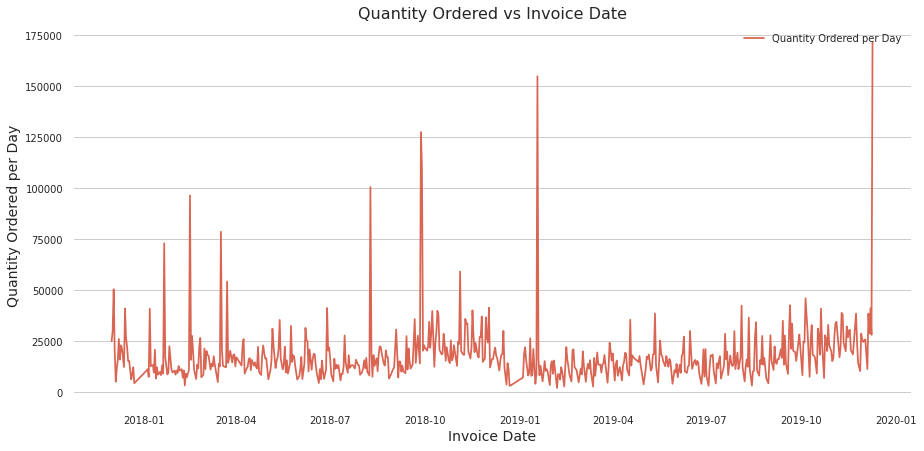

In [27]:
figure = plt.figure(figsize = [15, 7])
sns.lineplot(x = 'InvoiceDate', y = 'Quantity', data = dx, color = '#D96552')

plt.xlabel('Invoice Date', size = 14)
plt.ylabel('Quantity Ordered per Day', size = 14)
plt.legend(labels = ['Quantity Ordered per Day'], loc = 'upper right', frameon = False)
plt.title('Quantity Ordered vs Invoice Date', size = 16)
plt.grid(b = True, axis = 'y')
plt.show()

**Observation:**

We can see high quantity ordered around the month of,

- September/October-2018 (~130000),

- January-2019 (~160000)and 

- January-2019 (~175000).

**<h4>Question 2: What is the total sales of product items per day by the customer?</h4>**



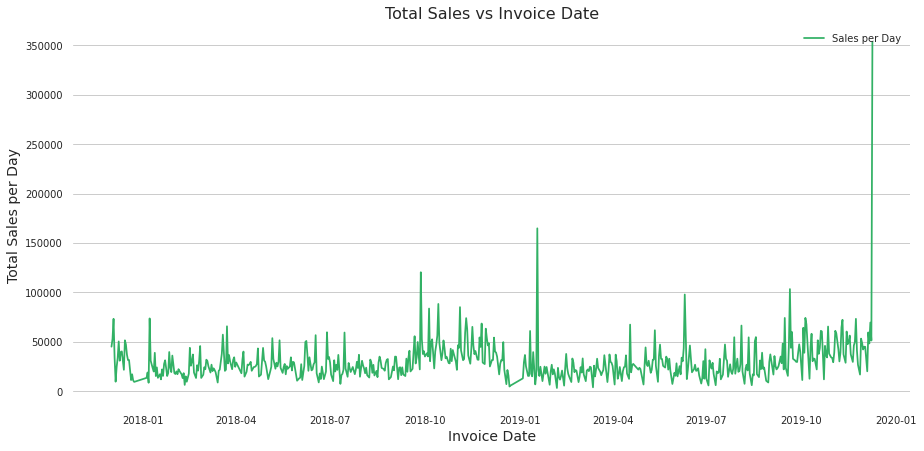

In [28]:
figure = plt.figure(figsize = [15, 7])
sns.lineplot(x = 'InvoiceDate', y = 'TotalSpend', data = dx, color = '#32B165')

plt.xlabel('Invoice Date', size = 14)
plt.ylabel('Total Sales per Day', size = 14)
plt.legend(labels = ['Sales per Day'], loc = 'upper right', frameon = False)
plt.title('Total Sales vs Invoice Date', size = 16)
plt.grid(b = True, axis = 'y')
plt.show()

**Observation:**

- **Sales** around the month of **January, 2019** was pretty **high** (**~&pound;165000 pounds**).

- **Sales** around the month of **December, 2019** was pretty **high** (**~&pound;360000 pounds**).

**<h4>Question 3: Which are the top 10 product that were sold at high quantity to the customer?</h4>**

In [29]:
dx = data.groupby(by = 'Description', as_index = False).agg('sum').sort_values(by ='Quantity', ascending = False)
# Selecting top 10 products
top_ = dx[0:10]

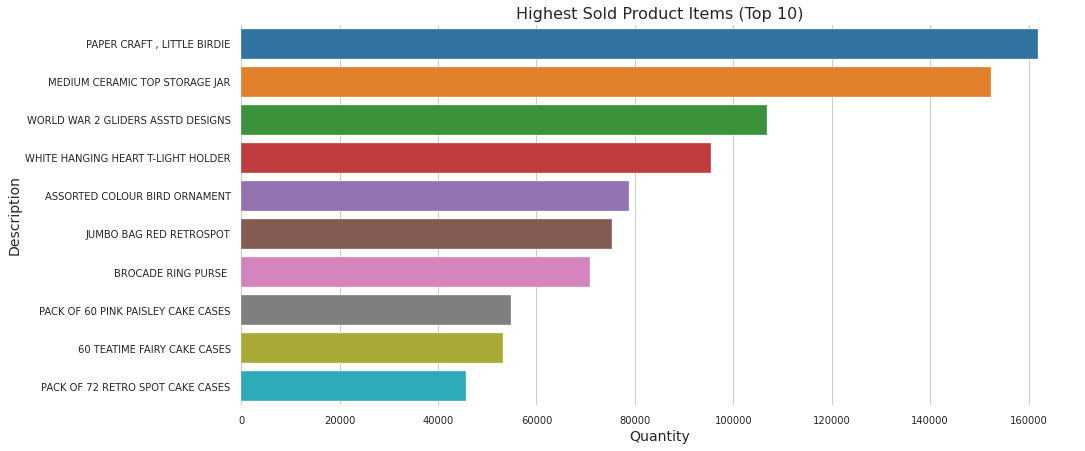

In [30]:
figure = plt.figure(figsize = [15, 7])
sns.barplot(x = 'Quantity', y ='Description', data = top_)
plt.xlabel(xlabel = 'Quantity', size = 14)
plt.ylabel(ylabel = 'Description', size = 14)
plt.title(label = 'Highest Sold Product Items (Top 10)', size = 16)
plt.grid(b = True, axis = 'x')
plt.show()

**Observation:**

- **Paper craft, little birdie** has been **sold** at **highest** **amount** of **quantity** than any other product item.

**<h4>Question 4: Which are the top 10 product items that were sold at low quantity to the customer?</h4>**

In [31]:
dx = data.groupby(by = 'Description', as_index = False).agg('sum').sort_values(by ='Quantity', ascending = True)
# Selecting top 10 products
top_ = dx[0:10]

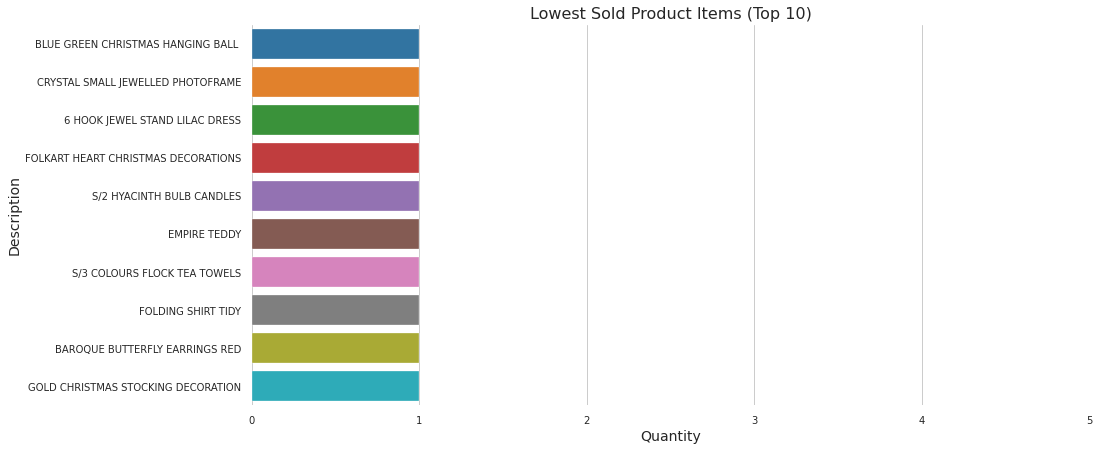

In [32]:
figure = plt.figure(figsize = [15, 7])
sns.barplot(x = 'Quantity', y ='Description', data = top_)
plt.xticks(ticks = range(0, 6))
plt.xlabel(xlabel = 'Quantity', size = 14)
plt.ylabel(ylabel = 'Description', size = 14)
plt.title(label = 'Lowest Sold Product Items (Top 10)', size = 16)
plt.grid(b = True, axis = 'x')
plt.show()

**Observation:**

- The **items** displayed **above** have been **sold** at only **unit** **quantity**.

**<h4>Question 5: What is the total amount that was spend by per country?</h4>**

- **Note:** There are total 41 countries, plotting all of these in one go is complex, instead we will divide the plot.

In [33]:
dx = data.groupby(by = 'Country', as_index = False).agg('sum').sort_values(by ='TotalSpend', ascending = False)

Note: Below X scale is different for both the plots


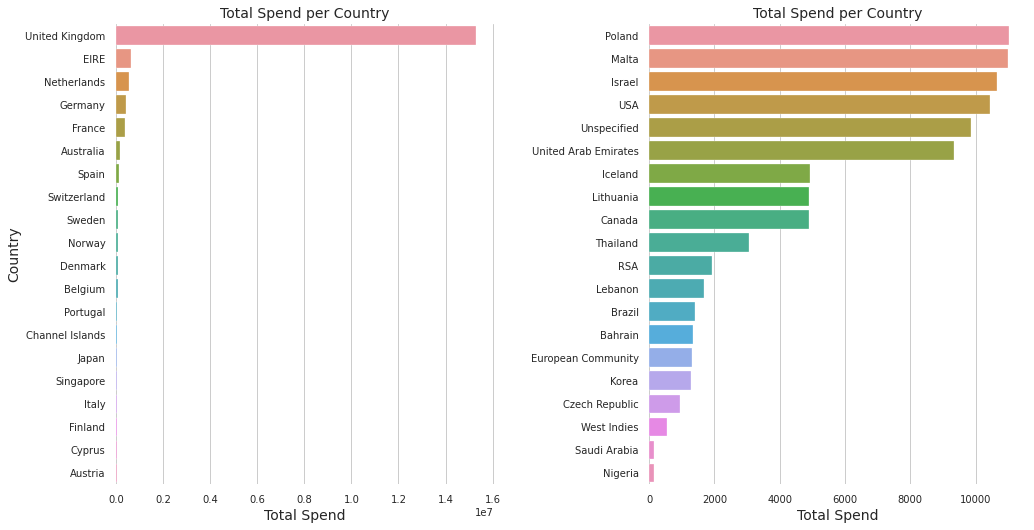

In [34]:
print('Note: Below X scale is different for both the plots')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [15, 8])
ax1 = sns.barplot(x = 'TotalSpend', y = 'Country', data = dx[0:20], ci = None, ax = ax1)
ax1.set_xlabel(xlabel = 'Total Spend', size = 14)
ax1.set_ylabel(ylabel = 'Country', size = 14)
ax1.set_title(label = 'Total Spend per Country', size = 14)
ax1.grid(b = True, axis = 'x')

ax2 = sns.barplot(x = 'TotalSpend', y = 'Country', data = dx[21:], ci = None, ax = ax2)
ax2.set_xlabel(xlabel = 'Total Spend', size = 14)
ax2.set_ylabel(ylabel = '')
ax2.set_title(label = 'Total Spend per Country', size = 14)
ax2.grid(b = True, axis = 'x')
plt.tight_layout(pad=3.0)
plt.show()

**Observation:**

- **United Kingdom** **spent** **highest** than any other country on buying items while **Nigeria** **spent** **lowest** than any other country.

**Note:** These are few question, from here if you would like to explore further, you are most welcome.

<a id = Section7></a>

---
# **7. Customer Segmentation Techniques**

- In this section we will explore two techniques of clustering customer i.e. using K-Means and RFM(Recency Frequency Monetary).
---

<a id = Section71></a>
## **7.1 Segmentation using K-Means**

- We will be **segmenting** **customers** **based** **on** their **behaviour** i.e the **quantity ordered** and **total amount** on that product.

- **Firstly**, we will **run** **K-means** at **default setting**. Then we will **tune** it over **multiple** **K values**, **finding optimal K**.

- But **before** that we will **normalized two features** that are important for clustering i.e. **Quantity and TotalSpend**.

In [35]:
data['LogQuantity'] = np.log1p(data['Quantity'])
data['LogTotalSpend'] = np.log1p(data['TotalSpend'])

In [36]:
kmeans = KMeans(n_clusters = 8, max_iter = 500, random_state = 42, n_jobs = -1)
kmeans.fit(data[['LogQuantity', 'LogTotalSpend']])
print('Within Sum of Square Variation (Inertia):', kmeans.inertia_)

Within Sum of Square Variation (Inertia): 194514.74470222794


### **7.1.1 Hyperparameter Tuning: Finding Optimal K**

- We **will** **iterate** our model **over** **some** **iterations**, finding optimal K value for clustering.

- We **check** **inertia**, defined as the mean squared distance between each instance and its closest centroid. Logically, as per the definition **lower** the **inertia** **better** the **model**.

- We will **use** **Elbow** **rule** in order to **find** the **optimal** **number** of **clusters**.

In [37]:
# Have some patience, may take some time :)
inertia_vals = []
K_vals = [x for x in range(1, 16)]

for i in K_vals:
  k_model = KMeans(n_clusters = i, max_iter = 500, random_state = 42, n_jobs = -1)
  k_model.fit(data[['LogQuantity', 'LogTotalSpend']])
  inertia_vals.append(k_model.inertia_)
  print('Iteration', i, 'completed')

Iteration 1 completed
Iteration 2 completed
Iteration 3 completed
Iteration 4 completed
Iteration 5 completed
Iteration 6 completed
Iteration 7 completed
Iteration 8 completed
Iteration 9 completed
Iteration 10 completed
Iteration 11 completed
Iteration 12 completed
Iteration 13 completed
Iteration 14 completed
Iteration 15 completed


In [38]:
# Visualzing the Inertia vs K Values
fig = go.Figure()

fig.add_trace(go.Scatter(x = K_vals, y = inertia_vals, mode = 'lines+markers'))
fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 1, dtick = 1),
                  title_text = 'Within Cluster Sum of Squared Distances VS K Values',
                  title_x = 0.5,
                  xaxis_title = 'K values',
                  yaxis_title = 'Cluster Sum of Squared Distances')
fig.show()

**Observation:**

- As we can see that the **cluster sum of squared distances** **values** are **pretty high**.

- We can see that **after** **K = 5**, there is **significant** **drop** in **inertia**.

- So **K = 5 is optimal** for our **solution**.

### **7.1.2 Final Model**

In [39]:
kmeans = KMeans(n_clusters = 5, max_iter = 500, random_state = 42, n_jobs = -1)
kmeans.fit(X = data[['LogQuantity', 'LogTotalSpend']])
data['Labels'] = kmeans.labels_
centers = kmeans.cluster_centers_

### **7.1.3 Visualization of Clusters**

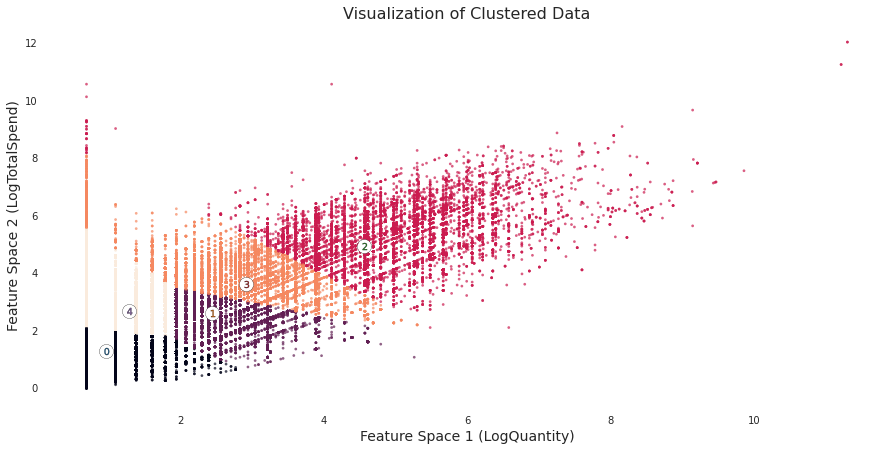

In [40]:
fig, ax1 = plt.subplots(1, 1, figsize = [15, 7])
ax1.scatter(x = data['LogQuantity'], y = data['LogTotalSpend'], marker='.', s = 30, lw = 0, alpha = 0.7, c = data['Labels'], edgecolor = 'k')
ax1.scatter(x = centers[:, 0], y = centers[:, 1], marker = 'o', c = "white", alpha = 1, s = 200, edgecolor = 'k')
for i, c in enumerate(centers):
  ax1.scatter(x = c[0], y = c[1], marker = '$%d$' % i, alpha = 1, s = 50, edgecolor = 'k')
plt.xlabel(xlabel = 'Feature Space 1 (LogQuantity)', size = 14)
plt.ylabel(ylabel = 'Feature Space 2 (LogTotalSpend)', size = 14)
plt.title(label = 'Visualization of Clustered Data', size = 16)
plt.show()

**Observation:**

- We can see **clusters** and their **respective centroids** are very **dense**.

- **To** **understand** **better** we will **look** at the **count** of each **cluster label**.

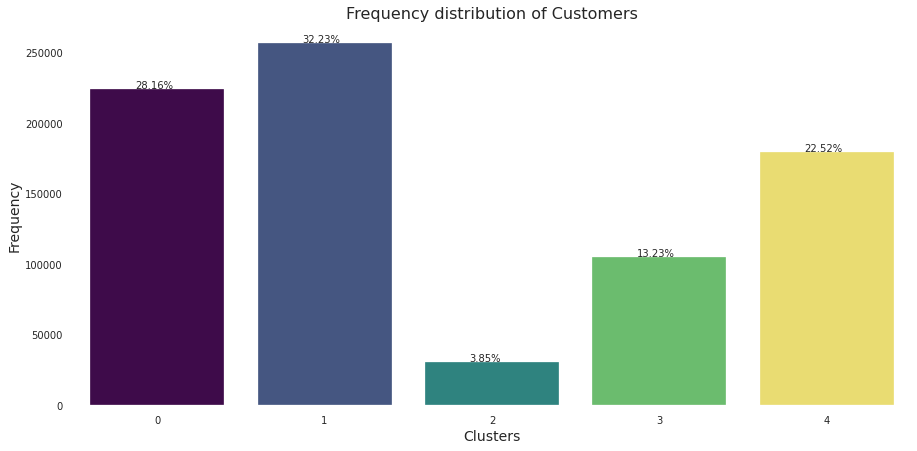

In [41]:
figure = plt.figure(figsize = [15, 7])
flatui = ["#440154", "#3B528B", "#21918C", "#5EC962", "#FDEB5E"]
ax = sns.countplot(x = 'Labels', data = data, palette = sns.color_palette(flatui))

total = data.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/ total)
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))

plt.xlabel('Clusters', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title(label = 'Frequency distribution of Customers', size = 16)
plt.show()

**Observation:**

- We can see that **clusters 1 and 4 are more profitable** **because** they seem to **order more quantity** as well as have **high purchase** values.

- For the **cluster 2**, both the **quantity and purchase** value is **less**.

- For the **cluster 0**, though the **quantity** ordered is **less**, the **purchase** value is **greater** than the cluster 3.

- On the other hand, the **cluster 3** has **higher quantity** ordered **than cluster 0** but the **purchase** value is **lesser**.

**Having identified the charactersitics of each cluster, we can roll out targeted advertising, promotion offers, etc.**

<a id = Section72></a>
## **7.2 Segmentation using RFM**

- RFM stands for **Recency**, **Frequency** and **Monetary**.
  - **RECENCY (R):** Days since last purchase. If score value is high it signifies that customer recently visited the shop.

  - **FREQUENCY (F):** Total number of purchases. If score value is high it signifies that customer buying frequency is high.

  - **MONETARY (M):** Total money customer spent. If score value is high it signifies that customer spending habit is high.

- It is a very **old technique** to **segment** the **customers** and it **works** **very** **well**.

- But it **work** **with** very **recent** **date**, so we **choose** **date** which is **one** **day** **more** than the **data of last day**.

**<h3>Working:</h3>**
- Firstly, we will calculate the RFM metrics for each customer.

|#|Customer|Recency|Frequency|Monetary|
| :-- | :-- | :-- | :-- | :-- |
|01|A|53 days|3 transactions|&pound;230|
|02|B|120 days|10 transactions|&pound;900|
|03|C|10 days|8 transactions|&pound;200|

- Secondly, we will add segment numbers to RFM table.

|#|Customer|Recency|Frequency|Monetary|R|F|M|
| :-- | :-- | :-- | :-- | :-- | :-- | :-- | :--|
|01|A|53 days|3 transactions|&pound;230|2|2|2
|02|B|120 days|10 transactions|&pound;900|1|1|2|
|03|C|10 days|8 transactions|&pound;200|3|3|3|

- Finally, Sort according to the RFM scores from the best customers (score 444).

|#|Segment|RFM|Description|Marketing|
| :-- | :-- | :-- | :-- | :-- |
|01|Best Customers|444|Bought most recently and most often, and spend the most|No price incentives, new products and loyalty programs.|
|02|Loyal Customers|X4X|Buys most frequently|Use R and F to further segment.|
|03|Big Spenders|XX4|Spends the most|Market your most expensive products.|
|04|Almost Lost|244|Haven't purchased for sometime, but purchased frequently and spend the most|Aggresive price incentives.|
|05|Lost Customers|144|Haven't puchased for some time, but purchased frequently and spend the most|Aggressive price incentives.|
|06|Lost Cheap Customers|111|Last purchase long ago, purchased few, and spent little.|Don't spend too much trying to re-acquire.|


In [42]:
print('Last Date:', data['InvoiceDate'].max())

Last Date: 2019-12-09 00:00:00


In [43]:
NOW = datetime.datetime(2019,12,10)

In [44]:
rmf_table = data.groupby(by = 'Customer ID', as_index = False).agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 
                                                                    'Invoice': lambda x: len(x), 
                                                                    'TotalSpend': lambda x: x.sum()})
rmf_table.rename(columns = {'InvoiceDate':'Recency', 'Invoice':'Frequency', 'TotalSpend':'Monetary'}, inplace = True)
rmf_table.head()

,Customer ID,Recency,Frequency,Monetary
0,12346,326,47,155164.66
1,12347,3,222,4921.53
2,12348,76,51,2019.40
3,12349,19,180,4452.84
4,12350,311,17,334.40


**Next we will segment the data according to the percentile i.e. 25%, 50% and 75%.**

In [45]:
quantiles = rmf_table.quantile(q = [0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()
quantiles

{'Customer ID': {0.25: 13831.5, 0.5: 15318.0, 0.75: 16802.5},
 'Frequency': {0.25: 20.0, 0.5: 52.0, 0.75: 140.0},
 'Monetary': {0.25: 342.32, 0.5: 880.8100000000002, 0.75: 2316.635},
 'Recency': {0.25: 25.0, 0.5: 96.0, 0.75: 382.0}}

**Below we have created two functions that will help in achieving R, F and M values**.

In [46]:
def calRecency(x, y, z):
  if x <= z[y][0.25]:
    return 4
  elif x <= z[y][0.50]:
    return 3
  elif x <= z[y][0.75]:
    return 2
  else:
    return 1

def calFrequencyMonetary(x, y, z):
  if x <= z[y][0.25]:
    return 1
  elif x <= z[y][0.50]:
    return 2
  elif x <= z[y][0.75]:
    return 3
  else:
    return 4

In [47]:
rmf_table['R Value'] = rmf_table['Recency'].apply(calRecency, args = ('Recency', quantiles))
rmf_table['F Value'] = rmf_table['Frequency'].apply(calFrequencyMonetary, args = ('Frequency', quantiles))
rmf_table['M Value'] = rmf_table['Monetary'].apply(calFrequencyMonetary, args = ('Monetary', quantiles))

In [48]:
rmf_table.head()

,Customer ID,Recency,Frequency,Monetary,R Value,F Value,M Value
0,12346,326,47,155164.66,2,2,4
1,12347,3,222,4921.53,4,4,4
2,12348,76,51,2019.40,3,2,3
3,12349,19,180,4452.84,4,4,4
4,12350,311,17,334.40,2,1,1


**Now we will append R, F and M score to a single feature.**

In [49]:
rmf_table['RFM Score'] = rmf_table['R Value'].map(str) + rmf_table['F Value'].map(str) + rmf_table['M Value'].map(str)
rmf_table.head()

,Customer ID,Recency,Frequency,Monetary,R Value,F Value,M Value,RFM Score
0,12346,326,47,155164.66,2,2,4,224
1,12347,3,222,4921.53,4,4,4,444
2,12348,76,51,2019.40,3,2,3,323
3,12349,19,180,4452.84,4,4,4,444
4,12350,311,17,334.40,2,1,1,211


**Finally we can see important customers.**

In [50]:
rmf_table[rmf_table['RFM Score'] == '444'].head()

,Customer ID,Recency,Frequency,Monetary,R Value,F Value,M Value,RFM Score
1,12347,3,222,4921.53,4,4,4,444
3,12349,19,180,4452.84,4,4,4,444
10,12356,23,142,6371.73,4,4,4,444
13,12359,8,372,9094.44,4,4,4,444
16,12362,4,275,5427.88,4,4,4,444


**Observation:**

- We can match respective customers with this tables to identify important customers.

|#|Segment|RFM|Description|Marketing|
| :-- | :-- | :-- | :-- | :-- |
|01|Best Customers|444|Bought most recently and most often, and spend the most|No price incentives, new products and loyalty programs.|
|02|Loyal Customers|X4X|Buys most frequently|Use R and F to further segment.|
|03|Big Spenders|XX4|Spends the most|Market your most expensive products.|
|04|Almost Lost|244|Haven't purchased for sometime, but purchased frequently and spend the most|Aggresive price incentives.|
|05|Lost Customers|144|Haven't puchased for some time, but purchased frequently and spend the most|Aggressive price incentives.|
|06|Lost Cheap Customers|111|Last purchase long ago, purchased few, and spent little.|Don't spend too much trying to re-acquire.|

<a id = Section8></a>

---
# **8. Conclusion**
---

- We **studied in depth about the data**, its **characteristics** and its **distribution**.

- We **explored various questions** related to the **customer behaviour** and their **residency** and **buying habits**.

- We **adopted two techniques** to **solve** this **business problem**:
  - Using K-Means
  - Using RFM (Recency Frequency Monetary)
  
- **Both** are **used widely**, but **RFM is much better** than automating the whole solution **because** we are **more precise** in **identifying** the **customer** frequent **buying habits** and their **spend**.